In [1]:
import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web

import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm

In [2]:
stock = 'AAPL'

In [3]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2017, 1, 11)

df = web.DataReader(stock, 'yahoo', start, end)
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-06,118.160004,116.470001,116.779999,117.910004,31751900.0,112.973305
2017-01-09,119.430000,117.940002,117.949997,118.989998,33561900.0,114.008080
2017-01-10,119.379997,118.300003,118.769997,119.110001,24462100.0,114.123047
2017-01-11,119.930000,118.599998,118.739998,119.750000,27588600.0,114.736275
2017-01-12,119.300003,118.209999,118.900002,119.250000,27086200.0,114.257195


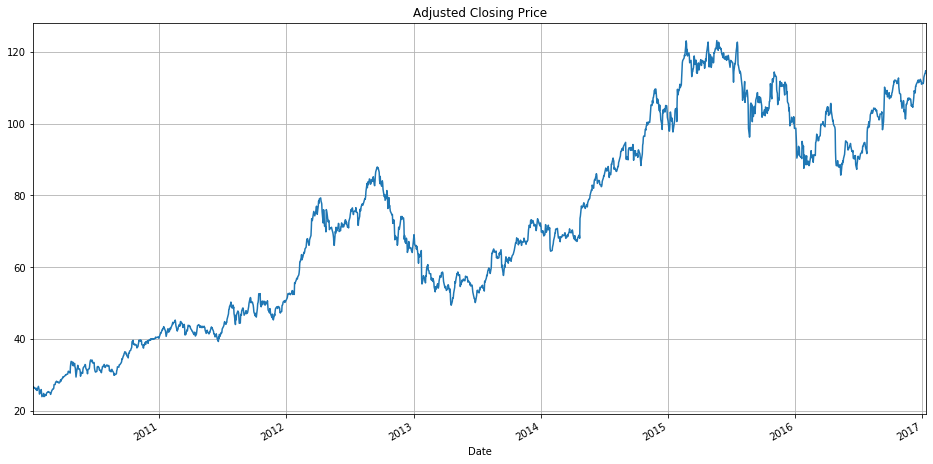

In [4]:
df['Adj Close'].plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

In [5]:
window_size = 32

num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

data = df['Adj Close'].values[indices]

X = data[:,:-1]
y = data[:,-1]

split_fraction = 0.8
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

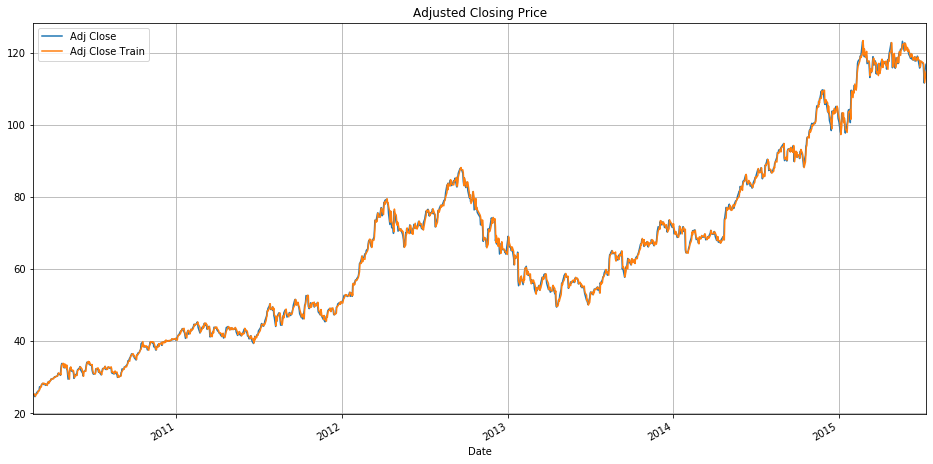

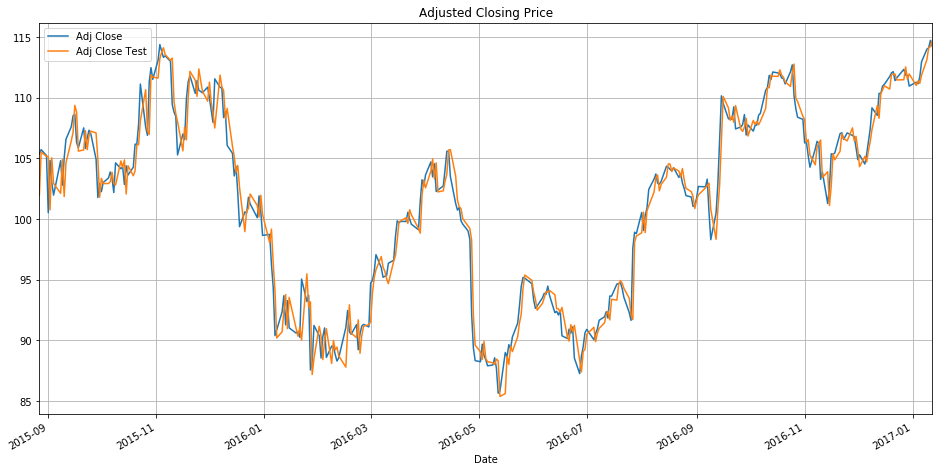

In [6]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

y_pred_train_ridge = ridge_model.predict(X_train)
y_pred_ridge = ridge_model.predict(X_test)

df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[window_size:ind_split] # Past 32 days we don't know yet
df_ridge['Adj Close Train'] = y_pred_train_ridge[:-window_size]
df_ridge.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

df_ridge = df.copy()
df_ridge.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_ridge = df_ridge.iloc[ind_split+window_size:] # Past 32 days we don't know yet
df_ridge['Adj Close Test'] = y_pred_ridge
df_ridge.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

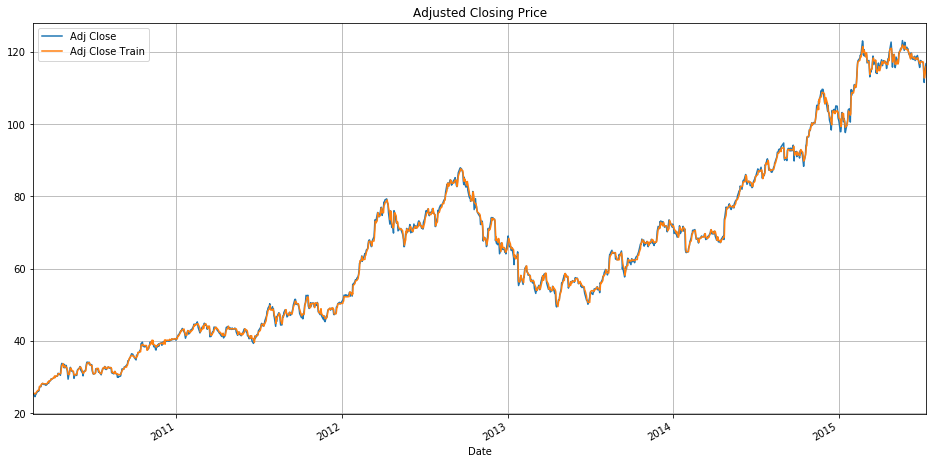

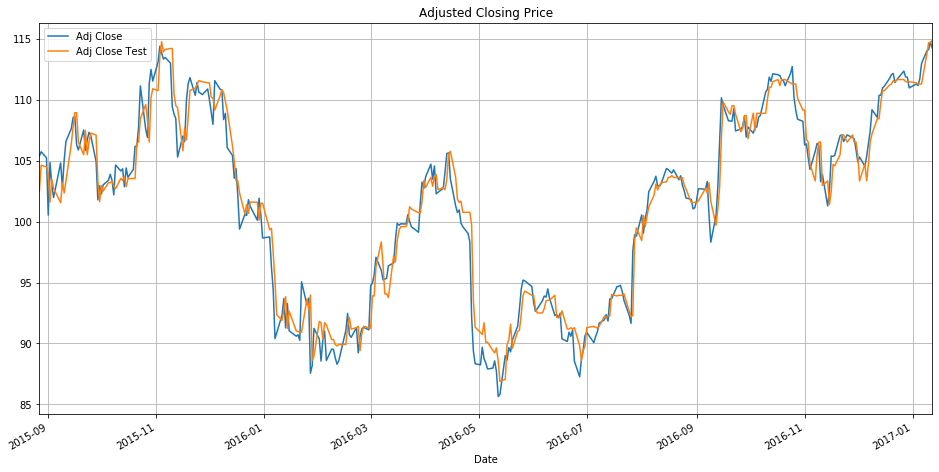

In [11]:
# Model #2 - Gradient Boosting Trees
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Infer
y_pred_train_gb = gb_model.predict(X_train)
y_pred_gb = gb_model.predict(X_test)

df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[window_size:ind_split]
df_gb['Adj Close Train'] = y_pred_train_gb[:-window_size]
df_gb.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

df_gb = df.copy()
df_gb.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_gb = df_gb.iloc[ind_split+window_size:]
df_gb['Adj Close Test'] = y_pred_gb
df_gb.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

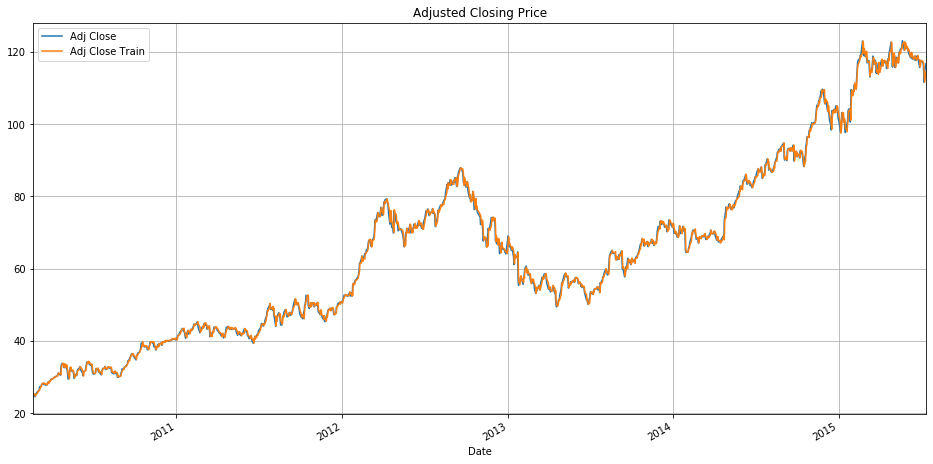

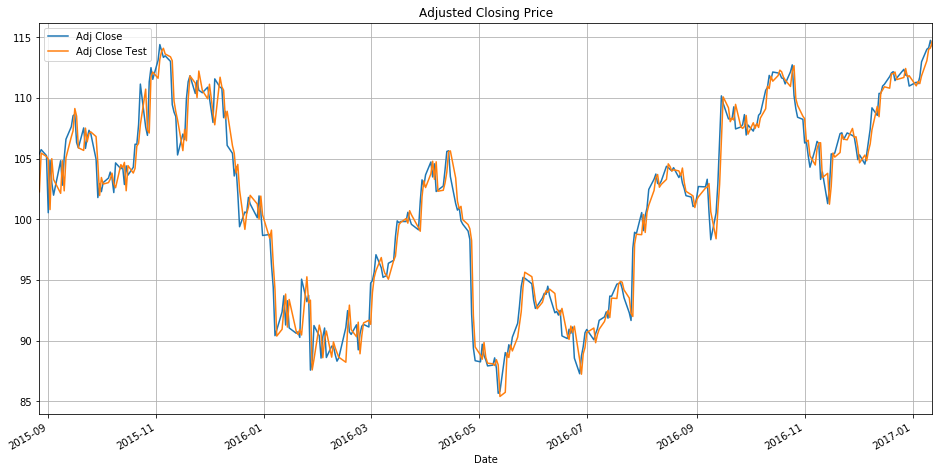

In [10]:
# Model #3 - Gradient Boosting Trees
br_model = BayesianRidge()
br_model.fit(X, y) 

# Infer
y_pred_train_br = br_model.predict(X_train)
y_pred_br = br_model.predict(X_test)

df_br = df.copy()
df_br.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_br = df_br.iloc[window_size:ind_split]
df_br['Adj Close Train'] = y_pred_train_br[:-window_size]
df_br.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

df_br = df.copy()
df_br.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_br = df_br.iloc[ind_split+window_size:]
df_br['Adj Close Test'] = y_pred_br
df_br.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

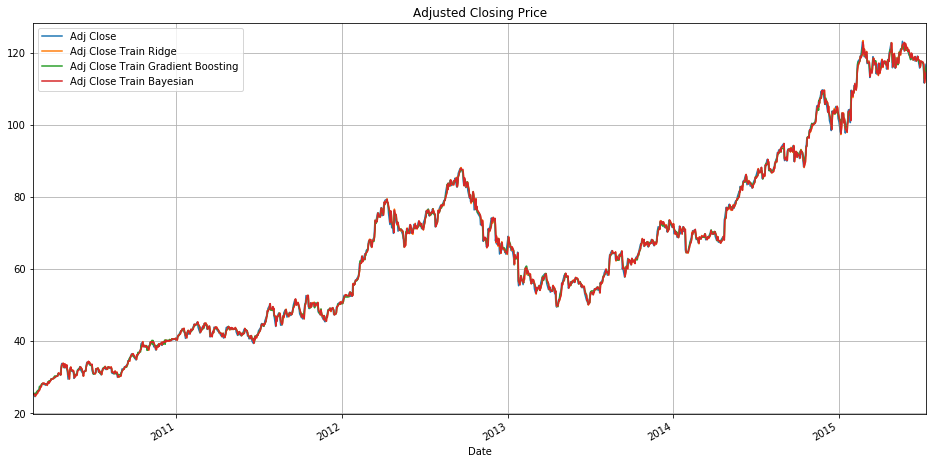

In [12]:
df_train = df.copy()
df_train.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_train = df_train.iloc[window_size:ind_split]

df_train['Adj Close Train Ridge'] = y_pred_train_ridge[:-window_size]
df_train['Adj Close Train Gradient Boosting'] = y_pred_train_gb[:-window_size]
df_train['Adj Close Train Bayesian'] = y_pred_train_br[:-window_size]

df_train.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)

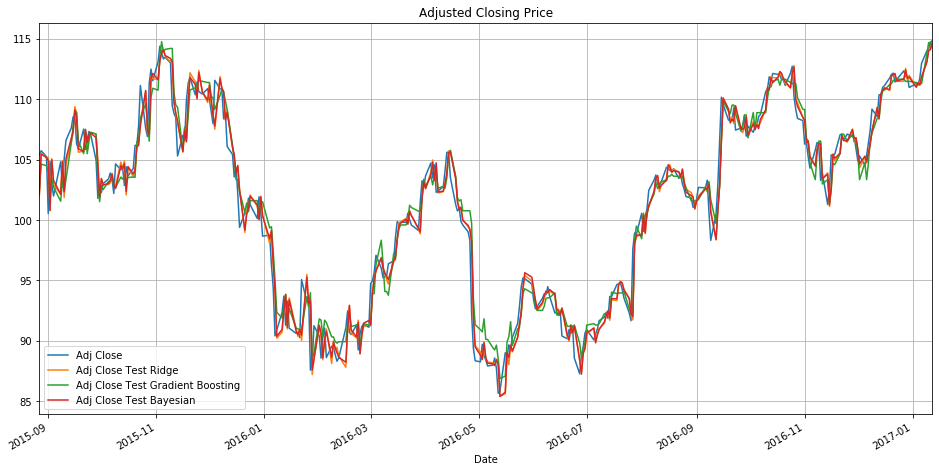

In [26]:
df_test = df.copy()
df_test.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1, inplace=True)
df_test = df_test.iloc[ind_split+window_size:]

df_test['Adj Close Test Ridge'] = y_pred_ridge
df_test['Adj Close Test Gradient Boosting'] = y_pred_gb
df_test['Adj Close Test Bayesian'] = y_pred_br

df_test.plot(label=stock, figsize=(16,8), title='Adjusted Closing Price', grid=True)